In [32]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import warnings
import numpy as np
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_rows', None)

In [33]:
#funkcje dostosowujące, czyszczące dane 
def count_aroma(x):
    aroma_count = len(x.split(";"))
    return aroma_count

def hop_wo_country_g(x):
    new_name = x.split(" ")
    poped = new_name.pop(-2)
    if poped in ('100g','50g'):
        name = " ".join(new_name)
    else:
        name = math.nan
    return name

def split_by_sep_bk_oils(x):
    if "-" not in x:
        try:
            float(x.replace(",","."))
            return float(x.replace(",","."))
        except:
            return math.nan
    try:
        float(x.split("-")[0].replace(",","."))
        return (float(x.split("-")[0].replace(",",".").replace("%",""))+float(x.split("-")[1].replace(",",".").replace("%","")))/2

    except:
        return math.nan

def split_by_sep_ak(x):
    
    try:
        float(x.split(";")[-1].replace(",","."))
        return float(x.split(";")[-1].replace(",","."))

    except:
        try:
            (float(x.split("-")[0].replace(",",".").replace("%",""))+float(x.split("-")[1].replace(",",".").replace("%","")))/2
            return (float(x.split("-")[0].replace(",",".").replace("%",""))+float(x.split("-")[1].replace(",",".").replace("%","")))/2
        except:
            return math.nan

In [34]:
#import danych z webscrapingu
df_hops = pd.read_csv("C://Users//Rafał//Desktop//rafalcecotka-projekty//webscraping_twoj_browar//chmiel.csv")

In [35]:
df_hops.head()

,Indeks,Alfa kwasy,Aromat,Beta kwasy,Cena,Dostępność,Forma Chmielu,Kohumulon,Kraj pochodzenia,Olejki,Rodzaj,Rok zbioru,Waga
0,Ahtanum 100g USA,"5-10%; 5,9",Kwiatowy; Grejpfrut,"4,0-6,0","28,00 zł",Duża dostępność,Granulat,30-33,USA,"0,5-1,7",Aromatyczne,2022.0,100g
1,Ahtanum 50g USA,"5-10%; 5,9",Kwiatowy; Grejpfrut,"4,0-6,0","14,00 zł",Duża dostępność,Granulat,30-33,USA,"0,5-1,7",Aromatyczne,2022.0,50g
2,Amarillo 100g USA,"5-10%; 10,1",Cytrusowy; Melonowy; Grejpfrut,"5,5-7,3","32,00 zł",Duża dostępność,Granulat,20-23,USA,"1,0-2,0",Uniwersalne,2022.0,100g
3,Amarillo 50g USA,"5-10%; 10,1",Cytrusowy; Melonowy; Grejpfrut,"5,5-7,3","16,00 zł",Duża dostępność,Granulat,20-23,USA,"1,0-2,0",Uniwersalne,2022.0,50g
4,Amora Preta 50g PL,"10-15%; 11,2",Owoce tropikalne; Truskawkowy; Limonkowy; Grej...,bd,"9,00 zł",Duża dostępność,Granulat,bd,Polska,bd,Uniwersalne,2022.0,50g


In [36]:
df_hops["Nazwa Chmielu"] = df_hops["Indeks"].apply(hop_wo_country_g)

In [37]:
df_hops["Liczba aromatów"] = df_hops["Aromat"].apply(count_aroma)

In [38]:
df_hops = df_hops[["Nazwa Chmielu","Alfa kwasy","Beta kwasy","Kohumulon","Olejki","Liczba aromatów"]].drop_duplicates()

In [39]:
#dane potencjalnie interesujące
df_hops

,Nazwa Chmielu,Alfa kwasy,Beta kwasy,Kohumulon,Olejki,Liczba aromatów
0,Ahtanum USA,"5-10%; 5,9","4,0-6,0",30-33,"0,5-1,7",2
2,Amarillo USA,"5-10%; 10,1","5,5-7,3",20-23,"1,0-2,0",3
4,Amora Preta PL,"10-15%; 11,2",bd,bd,bd,5
5,Azacca USA,10-15%; 12,"4,0-6,0",35-40,"1,0-2,0",3
7,Bravo USA,"10-15%; 14,5","3,0-5,0",29-34,"1,6-2,4",2
9,Calypso USA,10-15%; 14,"5,0-6,0",40-42,"1,6-2,4",2
11,Cascade PL,"5-10%; 5,5","4,8-7",33-40,"0,7-1,4",2
12,Cascade USA,"5-10%; 6,5","3,0-5,0",30-56,"0,8-2,5",2
15,Centennial USA,"5-10%; 10,9","3,5-5,0",23-26,"1,0-3,0",2
17,Challenger UK,"5-10%; 8,3","2,0-3,0",27-39,"1,0-1,5",1


In [40]:
df_hops["a_kwasy_number"] = df_hops["Alfa kwasy"].apply(lambda x: split_by_sep_ak(x))

df_hops["b_kwasy_number"] = df_hops["Beta kwasy"].apply(lambda x: split_by_sep_bk_oils(x))

df_hops["oil_number"] = df_hops["Olejki"].apply(lambda x: split_by_sep_bk_oils(x))

df_hops["kohumulon_number"] = df_hops["Kohumulon"].apply(lambda x: split_by_sep_bk_oils(x))

df_hops["ab_kwasy"] = df_hops["a_kwasy_number"] + df_hops["b_kwasy_number"]

In [41]:
#usunięcie NA
df_hops.dropna(how='any',inplace=True)

In [42]:
#wybór danych do klasyfikacji
df_X = df_hops[['oil_number','Liczba aromatów']]
X=np.array(df_X)

In [43]:
WCSS = []
 
for k in range(1,15):
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)

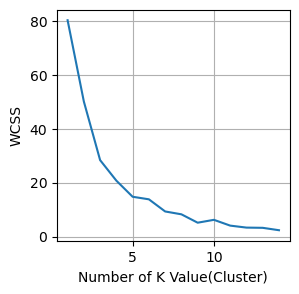

In [44]:
plt.figure(figsize=(3,3))
plt.plot(range(1,15),WCSS)

plt.xlabel("Number of K Value(Cluster)")
plt.ylabel("WCSS")
plt.grid()
plt.show()

In [45]:
# budowa modelu dla 4 klastrów
kmeans =KMeans(n_clusters = 4 ,max_iter=300, random_state= 1, n_init='auto')
clusters = kmeans.fit_predict(X) 
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

kmeans =KMeans(n_clusters = 3 ,max_iter=300, random_state= 1, n_init='auto')
clusters = kmeans.fit_predict(X) 
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

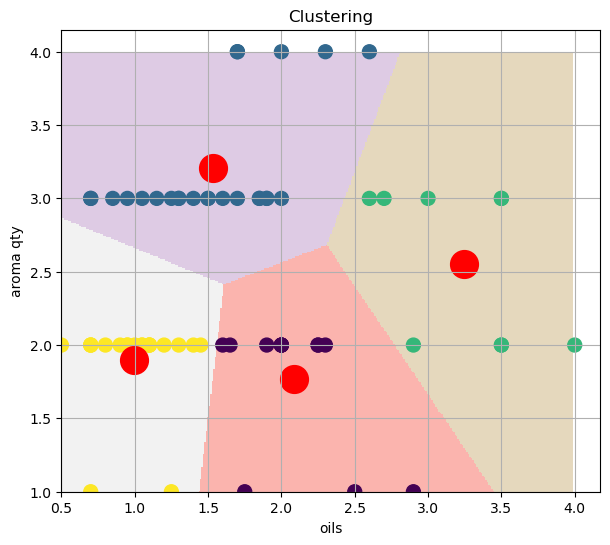

In [48]:
#graficzna prezentacja
h = 0.01
x_min, x_max = X[:,0].min(), X[:,0].max()
y_min, y_max = X[:,1].min(), X[:,1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]) 
Z = Z.reshape(xx.shape)
 
plt.figure(1 , figsize = (12 , 6) )
plt.clf()
 
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel1, origin='lower')
 
plt.scatter(x=X[:,0], y=X[:,1], c=labels, s=100)
 
plt.scatter(x=centroids[:,0], y=centroids[:,1],s=400 , c='red')
 
plt.ylabel('aroma qty') , plt.xlabel('oils')
plt.grid()
plt.title("Clustering")
plt.show()

In [47]:
#klasyfikacja chmieli
df_X['lab'] = labels
df_X['hop'] = df_hops['Nazwa Chmielu']
df_X.sort_values(by='lab')

,oil_number,Liczba aromatów,lab,hop
109,2.25,2,0,Summit USA
75,2.00,2,0,Marynka PL
33,2.90,1,0,El Dorado USA
101,1.90,2,0,Simcoe USA
23,2.25,2,0,Citra USA
15,2.00,2,0,Centennial USA
59,2.30,2,0,Iunga PL
119,2.50,1,0,Vic Secret AUS
9,2.00,2,0,Calypso USA
123,1.75,1,0,Warrior USA
